## SOM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Nikiforova_prep.csv', sep=';')
df

,square,type,reviews,cars_per_day,average_income_of_customers,road,place_for_walk,coating_quality,spontaneous_trade,place_for_picnic,success
0,9.00,1,42.820513,12679.0,14910.0,0.0,0.0,0.0,0.0,0.0,0
1,30.00,1,8.000000,12800.0,9030.0,0.0,0.0,0.0,0.0,0.0,0
2,15.00,1,42.820513,77106.0,9030.0,0.0,0.0,0.0,0.0,0.0,0
3,20.00,1,42.820513,0.0,13930.0,0.0,0.0,0.0,0.0,0.0,0
4,30.00,0,42.820513,0.0,14560.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
59,30.00,1,25.000000,8771.0,11130.0,1.0,1.0,0.0,0.0,0.0,0
60,51.77,1,4.000000,146.0,9800.0,1.0,0.0,0.0,0.0,0.0,1
61,27.26,1,3.000000,6661.0,12600.0,0.0,0.0,0.0,0.0,0.0,1
62,50.93,0,17.000000,0.0,12460.0,0.0,0.0,0.0,0.0,0.0,0


Шкалируем данные.

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)

Кластеризацию проводим на значимых и вариантивных переменных square, average_income_of_customers,road,place_for_picnic.

In [4]:
X = df[:, [0,4,5,9]]

In [5]:
X 

array([[0.04310345, 0.91304348, 0.        , 0.        ],
       [0.22413793, 0.        , 0.        , 0.        ],
       [0.09482759, 0.        , 0.        , 0.        ],
       [0.13793103, 0.76086957, 0.        , 0.        ],
       [0.22413793, 0.85869565, 0.        , 0.        ],
       [0.46293103, 0.88043478, 1.        , 0.        ],
       [0.39655172, 0.59782609, 0.        , 1.        ],
       [0.35344828, 0.39130435, 1.        , 0.        ],
       [0.19827586, 0.29347826, 1.        , 0.        ],
       [0.43534483, 0.59782609, 0.        , 1.        ],
       [0.09482759, 0.61956522, 0.        , 0.        ],
       [0.19905172, 0.48913043, 1.        , 0.        ],
       [0.45387931, 0.17391304, 1.        , 0.        ],
       [0.65517241, 0.83695652, 0.        , 0.        ],
       [0.18103448, 0.2826087 , 1.        , 0.        ],
       [0.40517241, 0.27173913, 1.        , 0.        ],
       [0.56896552, 0.37089965, 0.        , 0.        ],
       [0.17241379, 0.15217391,

In [6]:
#! pip install SimpSOM

Обучаем сеть, закрепив случайность на одном уровне для точности сравнения. Размерость нужно выбрать приблизительно в 10 раз меньше, чем количество торговых точек, но у нас мало объектов, поэтому пусть будет 5*5.

In [7]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(5, 5, X, PBC=True)
net.train(0.01, 20000)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!       


В левом нижнем углу объекты с высокой площадью, в верхнем правом-с низкой.

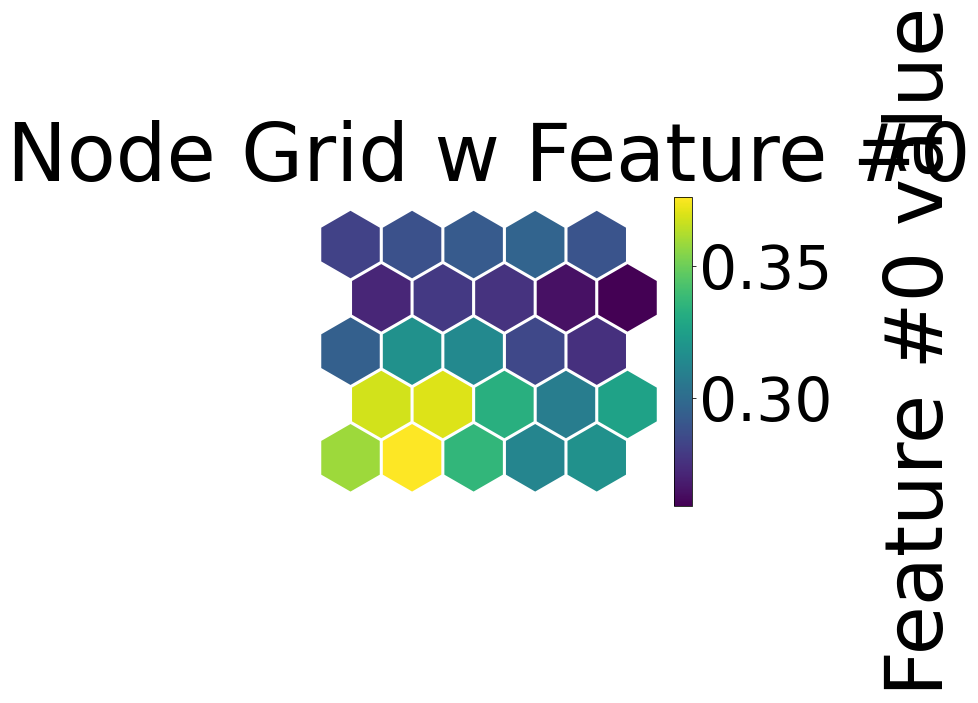

In [8]:
net.nodes_graph(colnum=0)

Справа и слева магазины с относительно высокими доходами покупателей, по центру-с низкими.

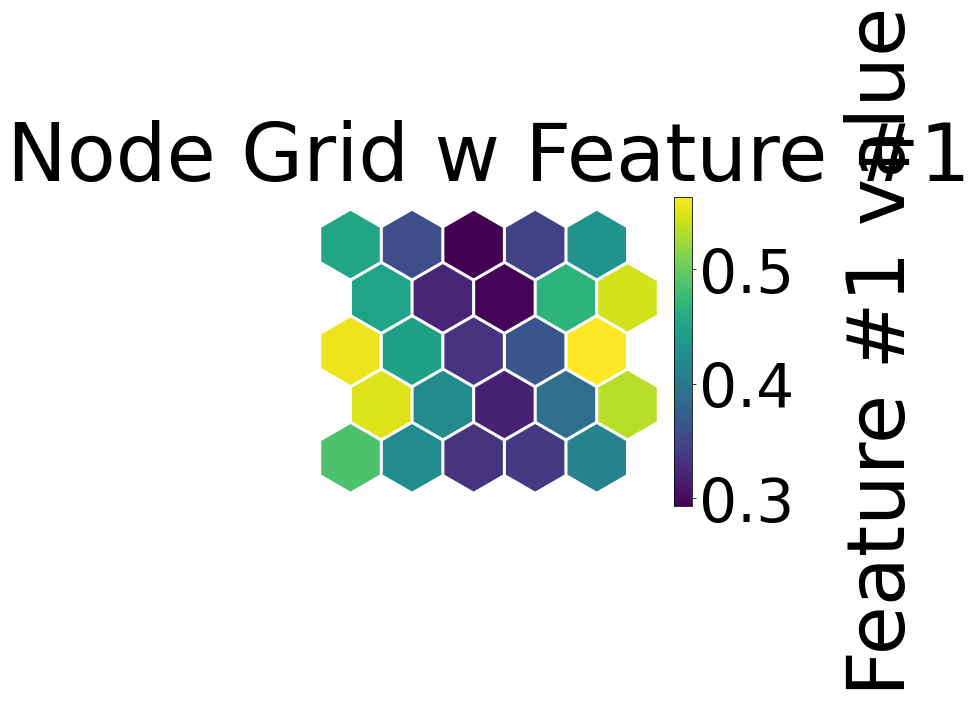

In [9]:
net.nodes_graph(colnum=1)

Слева сверху торговые точки с плохим дорожным покрытием, справа снизу и сверху- с хорошим.

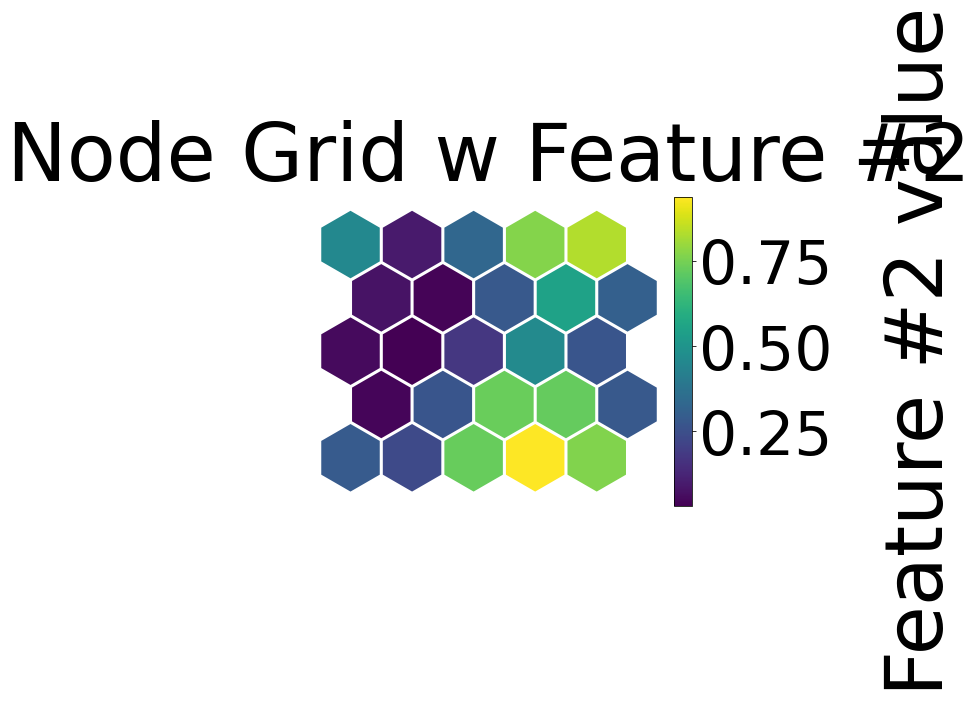

In [10]:
net.nodes_graph(colnum=2)

Место для пикника есть у объектов справа по центру и слева по центру. У торговых точек сверху по центру они отсутствуют.

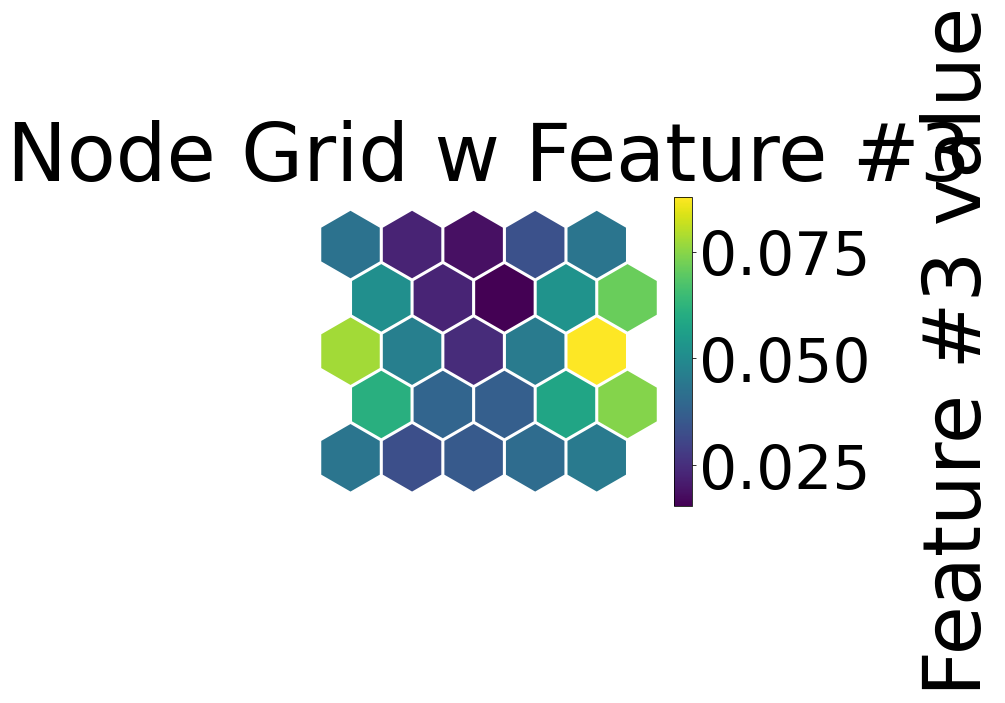

In [11]:
net.nodes_graph(colnum=3)

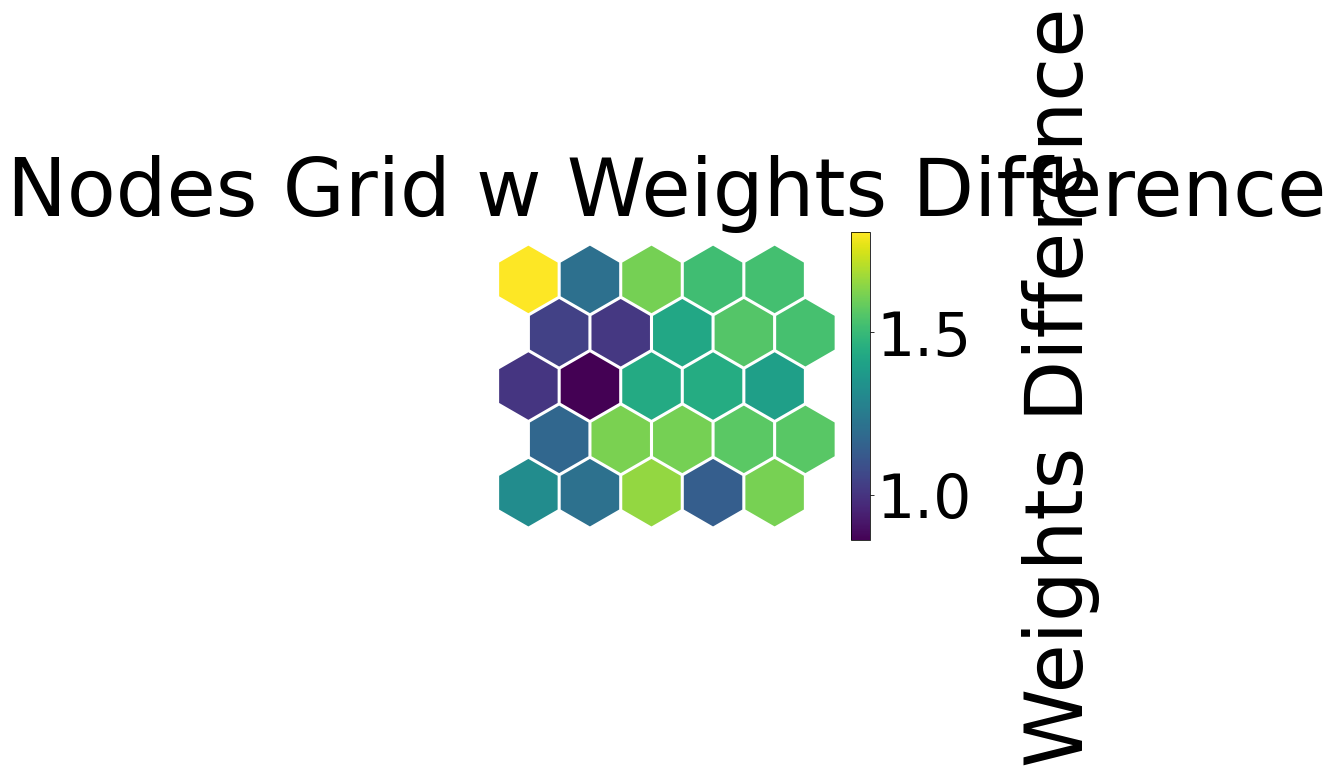

In [12]:
net.diff_graph()

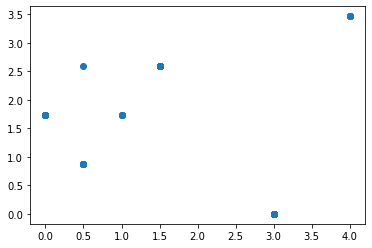

In [13]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)

Пришло время описать полученные 3 кластера.Видим примерно 3 кластера:
1. Небольшая площадь, доход покупателей выше среднего, дорожное покрытие чаще всего есть, как и место для пикника. Это могут быть небольшие магазинчики у дома с обустроенной территорией. Примерами у нас могут быть Посад или АТБ, у них также иногда есть площадки для детей рядом.
2. Большие магазины, высокий доход покупателей, нет дорожного покрытия и места для пикника. Пример-это METRO, Ашан или Сильпо, где цены часто выше, чем в том же АТБ, но ассортимент, площадь магазина огромные, хотя и пикник на территории ты явно не устроишь.
3. Средние магазины, средние доходы покупателей, нет дорожного покрытия и места для пикника. Магазаны по типу Чудо отлично вписываются в эту категорию.

In [15]:
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc_var = obj["hc_var"]

Сравниваем методы кластеризации. Совпадение с иерархическим 50%, а с k-средними 52%. Это достаточно низкое совпадение.

In [16]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc_var,kmeans.labels_)

0.502371172347506

In [17]:
import pickle
input = open('clust-km.pkl', 'rb')
obj = pickle.load(input)
input.close()
km_var = obj["km_var"]

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km_var,kmeans.labels_)

0.524585323281053

## Вывод

Понятное, дело, что кластеризацию лучше проводить на значимых и вариативных переменных. У нас это площадь, доход покупателей, наличие дорожного покрытия и место для пикника, как ни странно. Совпадение на кластеризации k-средних и иерархической высокое, поэтому можем говорить, что она проведена качественно. В итоге мы выделяем 3 кластера со следующими характеритисками (попробуем совместить результаты кластеризаций)

1.Небольшая площадь, доход покупателей выше среднего, дорожное покрытие чаще всего есть, как и место для пикника. Это могут быть небольшие магазинчики у дома с обустроенной территорией. Примерами у нас могут быть Посад или АТБ, у них также иногда есть площадки для детей рядом.

2.Большие магазины, высокий доход покупателей, нет дорожного покрытия и места для пикника. Пример-это METRO, Ашан или Сильпо, где цены часто выше, чем в том же АТБ, но ассортимент, площадь магазина огромные, хотя и пикник на территории ты явно не устроишь.

3.Средние магазины, средние доходы покупателей, нет дорожного покрытия и места для пикника. Магазаны по типу Чудо отлично вписываются в эту категорию.
Эти группы могут быть использованы для других рейтингов, анализа рынка торговли, инвестиционной привлекательности и т.д. 